In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import string
import nltk
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train.csv", encoding='latin-1', header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.shape

(1600000, 6)

In [6]:
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)  # Convert 4 -> positive(1), 0 -> negative(0)

In [7]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
# check for duplicates
df.duplicated().sum()

16309

In [9]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.drop_duplicates(subset='text', inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(1581466, 2)

In [13]:
import nltk

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ansh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words('english'))


In [17]:
lemmatizer = WordNetLemmatizer()


In [18]:
def preprocess_text(text):
    # 1. Remove URLs, mentions, hashtags, and non-letters:
    text = re.sub(r"http\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text).lower()
    # 2. Simple whitespace tokenization (no Punkt needed):
    tokens = text.split()
    # 3. Optionally remove stopwords & lemmatize:
    cleaned = []
    for t in tokens:
        if t in stop_words: 
            continue
        t = lemmatizer.lemmatize(t)
        if len(t) > 2:
            cleaned.append(t)
    return " ".join(cleaned)

In [19]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [20]:
df = df[df['clean_text'].str.strip() != ""]

In [21]:
df = df[~df['clean_text'].str.fullmatch(r'(.)\1*')] 

In [22]:
df['text_len'] = df['text'].apply(len)

In [23]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [24]:
df.head()

,target,text,clean_text,text_len,word_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...,115,9
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,111,12
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound,89,8
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,6
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad cant see,111,4


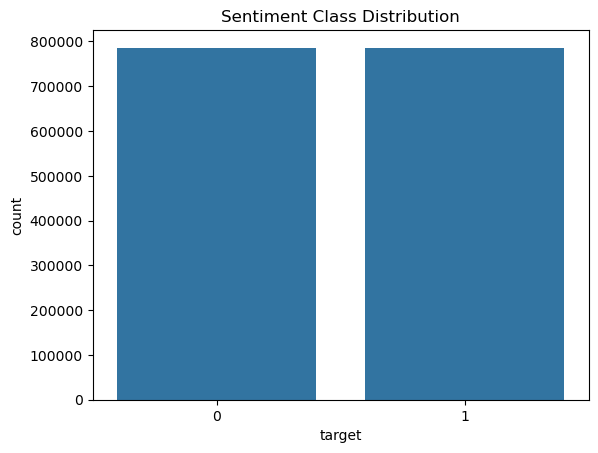

In [25]:
#Class distribution
sns.countplot(data=df, x='target')
plt.title("Sentiment Class Distribution")
plt.show()

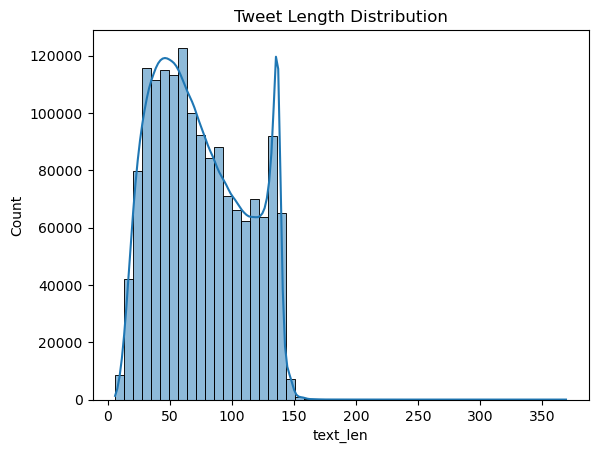

In [26]:
#Length distribution
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title("Tweet Length Distribution")
plt.show()

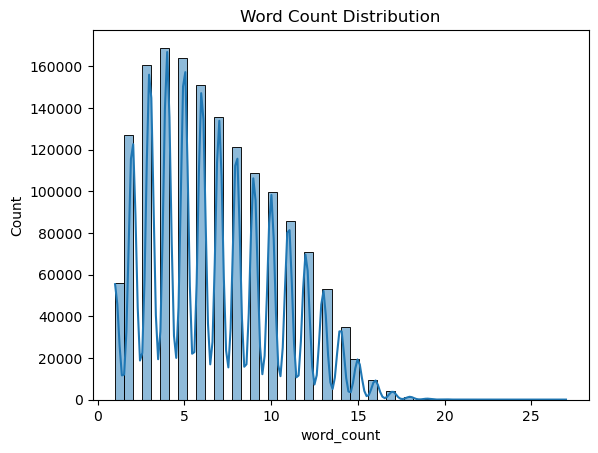

In [27]:
# Word count
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.show()

In [28]:
pos_text = " ".join(df[df['target'] == 1]['clean_text'].tolist())
neg_text = " ".join(df[df['target'] == 0]['clean_text'].tolist())

In [29]:
from wordcloud import WordCloud

(-0.5, 599.5, 299.5, -0.5)

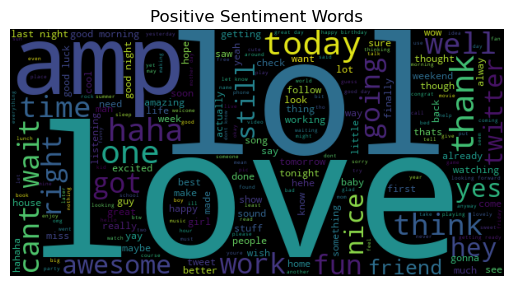

In [30]:
#WordClouds
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=300).generate(pos_text))
plt.title("Positive Sentiment Words")
plt.axis("off")

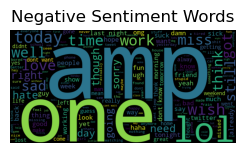

In [31]:
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=300).generate(neg_text))
plt.title("Negative Sentiment Words")
plt.axis("off")
plt.show()

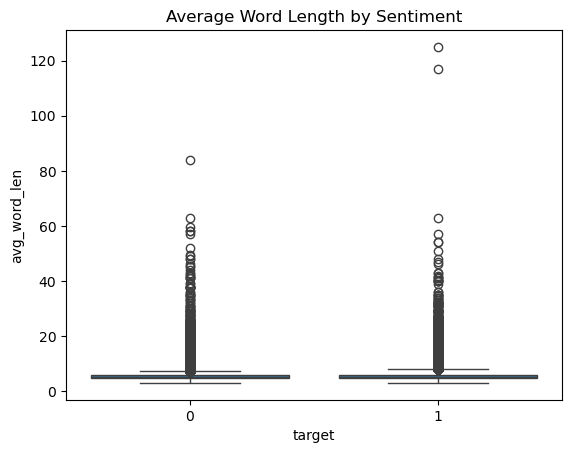

In [32]:
#Average Word Length by Sentiment
df['avg_word_len'] = df['clean_text'].apply(lambda x: np.mean([len(w) for w in x.split()]) if x else 0)
sns.boxplot(data=df, x='target', y='avg_word_len')
plt.title("Average Word Length by Sentiment")
plt.show()

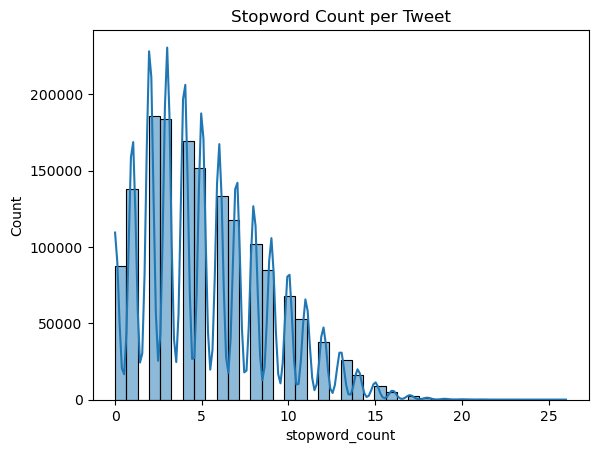

In [33]:
#Number of Stopwords per Tweet
df['stopword_count'] = df['text'].apply(lambda x: len([w for w in x.lower().split() if w in stop_words]))
sns.histplot(df['stopword_count'], bins=40, kde=True)
plt.title("Stopword Count per Tweet")
plt.show()

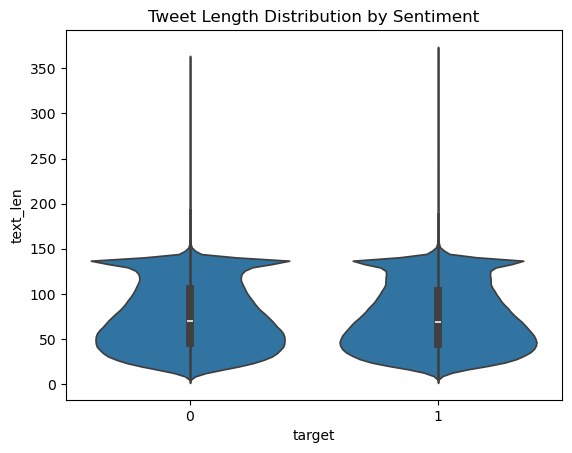

In [34]:
#Tweet Length vs Sentiment
sns.violinplot(data=df, x='target', y='text_len')
plt.title("Tweet Length Distribution by Sentiment")
plt.show()


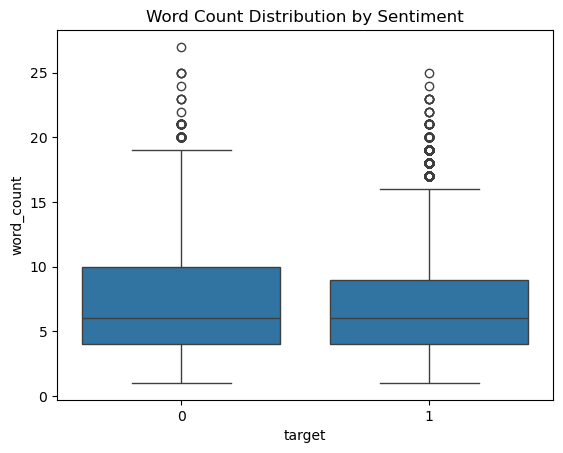

In [35]:
# Word Count vs Sentiment
sns.boxplot(data=df, x='target', y='word_count')
plt.title("Word Count Distribution by Sentiment")
plt.show()

In [36]:
#Sentiment vs WordCloud for Specific Words (e.g., "love", "hate")
love_df = df[df['clean_text'].str.contains("love")]
hate_df = df[df['clean_text'].str.contains("hate")]

(-0.5, 499.5, 299.5, -0.5)

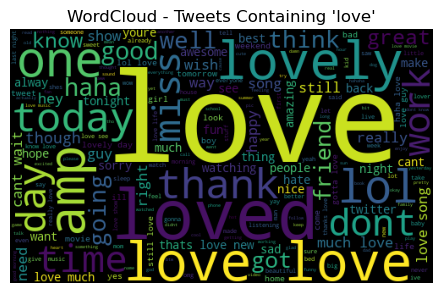

In [37]:
#Love
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=500, height=300).generate(" ".join(love_df['clean_text'])))
plt.title("WordCloud - Tweets Containing 'love'")
plt.axis("off")

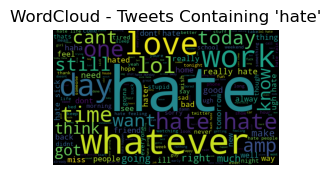

In [38]:
#Hate
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=500, height=300).generate(" ".join(hate_df['clean_text'])))
plt.title("WordCloud - Tweets Containing 'hate'")
plt.axis("off")
plt.show()

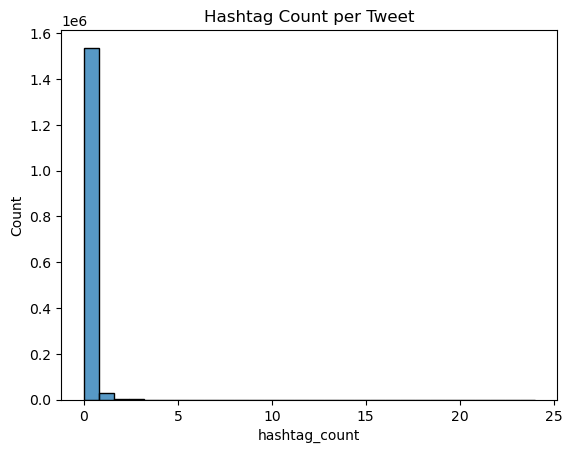

In [39]:
#Hashtag Count per Tweet
df['hashtag_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.startswith("#")]))
sns.histplot(df['hashtag_count'], bins=30, kde=False)
plt.title("Hashtag Count per Tweet")
plt.show()

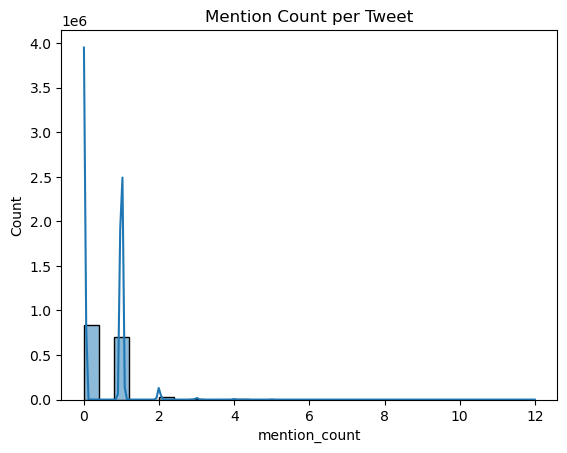

In [40]:
#Mention (@user) Count per Tweet
df['mention_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.startswith("@")]))
sns.histplot(df['mention_count'], bins=30, kde=True)
plt.title("Mention Count per Tweet")
plt.show()

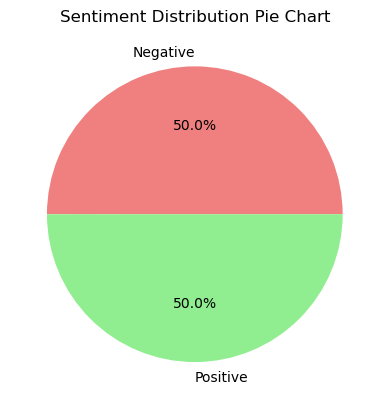

In [41]:
#Pie Chart of Sentiment Distribution
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=["Negative", "Positive"], colors=["lightcoral", "lightgreen"])
plt.title("Sentiment Distribution Pie Chart")
plt.ylabel("")  # Hide y-axis label
plt.show()

In [42]:
df['question_count']    = df['text'].apply(lambda x: x.count('?'))

In [43]:
df['exclaim_count']     = df['text'].apply(lambda x: x.count('!'))

In [44]:
negations = {'not','no','never','none','nobody','nothing','neither','nowhere','hardly','scarcely','barely'}
df['negation_count']    = df['clean_text'].apply(lambda x: sum(1 for w in x.split() if w in negations))

In [45]:
df['avg_word_len']      = df['clean_text'].apply(lambda x: np.mean([len(w) for w in x.split()]) if x else 0)

In [46]:
df['url_count']         = df['text'].apply(lambda x: len(re.findall(r'http\\S+', x)))
df['has_url']           = (df['url_count'] > 0).astype(int)

In [47]:
df['has_exclaim'] = df['text'].apply(lambda x: 1 if '!' in x else 0)

In [48]:
df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))

In [49]:
df['mention_count'] = df['text'].apply(lambda x: x.count('@'))


In [50]:
extra_feats = ['has_exclaim','exclaim_count','question_count','hashtag_count','mention_count','negation_count','avg_word_len',
               'url_count','has_url']


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_extra = pd.DataFrame(scaler.fit_transform(df[extra_feats]), columns=extra_feats)

In [52]:
df.head()

,target,text,clean_text,text_len,word_count,avg_word_len,stopword_count,hashtag_count,mention_count,question_count,exclaim_count,negation_count,url_count,has_url,has_exclaim
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats bummer shoulda got david carr third...,115,9,4.666667,5,0,1,0,0,0,0,0,0
1,0,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,111,12,5.250000,8,0,0,0,1,0,0,0,1
2,0,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest bound,89,8,4.625000,7,0,1,0,0,0,0,0,0
3,0,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,6,4.333333,4,0,0,0,0,0,0,0,0
4,0,"@nationwideclass no, it's not behaving at all....",behaving mad cant see,111,4,4.500000,12,0,1,1,0,0,0,0,0


In [53]:
from nltk.tokenize import word_tokenize

In [54]:
MAX_VOCAB = 20000
MAX_LEN   = 50
EMBED_DIM = 128

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")

In [57]:
tokenizer.fit_on_texts(df['clean_text'])

In [58]:
sequences = tokenizer.texts_to_sequences(df['clean_text'])

In [59]:
X = pad_sequences(sequences, maxlen=MAX_LEN)

y = df['target'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
model = Sequential([
    Embedding(
        input_dim=MAX_VOCAB,
        output_dim=EMBED_DIM,
        input_length=MAX_LEN,
        name="Embedding"
    ),
    Bidirectional(LSTM(64, return_sequences=True), name="BiLSTM_1"),
    Dropout(0.3, name="Dropout_1"),
    Bidirectional(LSTM(32), name="BiLSTM_2"),
    Dense(32, activation="relu", name="Dense_1"),
    Dropout(0.3, name="Dropout_2"),
    Dense(1, activation="sigmoid", name="Output")
])



In [64]:
model.build(input_shape=(None, MAX_LEN))  

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Embedding (Embedding)           │ (None, 50, 128)        │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BiLSTM_1 (Bidirectional)        │ (None, 50, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BiLSTM_2 (Bidirectional)        │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,702,145 (10.31 MB)

 Trainable params: 2,702,145 (10.31 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',    # watch validation loss
    patience=2,            # stop after 2 epochs with no improvement
    restore_best_weights=True
)

In [67]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,   # 10% of train for validation
    epochs=10,              # up to 10 passes through the data
    batch_size=512,         # number of samples per gradient update
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/10
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 668s 298ms/step - accuracy: 0.7539 - loss: 0.4992 - val_accuracy: 0.7895 - val_loss: 0.4481
Epoch 2/10
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 639s 289ms/step - accuracy: 0.7988 - loss: 0.4350 - val_accuracy: 0.7941 - val_loss: 0.4406
Epoch 3/10
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 646s 292ms/step - accuracy: 0.8087 - loss: 0.4154 - val_accuracy: 0.7944 - val_loss: 0.4446
Epoch 4/10
2211/2211 ━━━━━━━━━━━━━━━━━━━━ 659s 298ms/step - accuracy: 0.8195 - loss: 0.3968 - val_accuracy: 0.7922 - val_loss: 0.4506


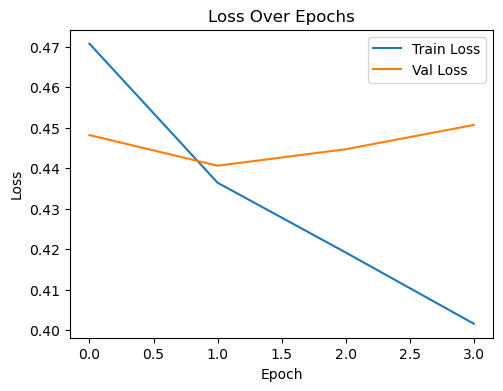

In [68]:
# Plot loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


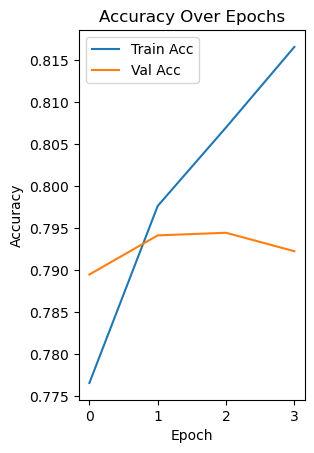

In [69]:
# Plot accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss:     {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

9825/9825 ━━━━━━━━━━━━━━━━━━━━ 168s 17ms/step - accuracy: 0.7956 - loss: 0.4393
Test Loss:     0.4414
Test Accuracy: 0.7935


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1) Generate predictions (probabilities → binary)
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int).flatten()

9825/9825 ━━━━━━━━━━━━━━━━━━━━ 158s 16ms/step


In [72]:
# 2) Classification report
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.80      0.79      0.79    156647
    Positive       0.79      0.80      0.80    157740

    accuracy                           0.79    314387
   macro avg       0.79      0.79      0.79    314387
weighted avg       0.79      0.79      0.79    314387



In [73]:
# 3) Confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [74]:
cm

array([[123196,  33451],
       [ 31462, 126278]], dtype=int64)

In [80]:
model.save("bilstm_model.h5") 

In [82]:
import pickle

In [83]:
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)